# Ordovician reconstructions of arcs, sutures, and temperatures

## Load functions and files

In [1]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import os
%matplotlib inline

### `pygplates` import

In [2]:
import sys
# Replace this with the path to your package
package_path = '/Applications/pygplates_0.36.0_py39_Darwin-x86_64'

# Append the directory to sys.path
if package_path not in sys.path:
    sys.path.append(package_path)
import pygplates

## Data file import

In [3]:
ceed_land_path = '../data/paleogeography/blocks/CEED6_LAND.shp'
ceed_poly_path = '../data/paleogeography/blocks/CEED6_POLY.shp'
rot_path = '../data/paleogeography/models/Torsvik_Cocks_HybridRotationFile.rot'

ceed_modified_land_path = '../data/paleogeography/blocks/CEED6-modified.shp'
modified_rot_path = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended.rot'
modified_rot_path_ice_centroid = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended_ice_centroid.rot'

## Make folder for temporary reconstruction output

The code requires generating reconstructions of shapefiles that are then read in as geopandas dataframe. This code checks for such a folder and makes it if it isn't already there.

In [4]:
output_folder = 'temp_reconstructions'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' created.")
else:
    print(f"Folder '{output_folder}' already exists.")

Folder 'temp_reconstructions' already exists.


## Define a function for making map axes

In [5]:
def make_map(projection, central_longitude=0, central_latitude=0, figsize=(6, 6),
             grid_lines=True,
             lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                       0.,   30.,   60., 90.,  120.,  150.,  180.],
             lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.],
             label_latitudes=False):

    fig = plt.figure(figsize=figsize)
    
    # Try to create the projection with both central_longitude and central_latitude
    try:
        map_projection = projection(central_longitude=central_longitude, central_latitude=central_latitude)
    except TypeError:
        # If that fails, try again with only central_longitude
        map_projection = projection(central_longitude=central_longitude)
    
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return fig, ax, map_projection

## Define paths to paleogeography features

In [6]:
land_color = 'wheat'
water_color = '#f0f8ff'

basins_path = '../data/paleogeography/features/Hirnantian_Glacial_Basins.shp'
glaciomarine_color = '#1f78b4'
grounded_ice_color = '#a6cee3' 
unconformity_color = '#c3c1c1'
basin_colors = {'M': glaciomarine_color, 'G': grounded_ice_color, 'U': unconformity_color}

highlands_path = '../data/paleogeography/features/Gondwana_highlands.shp'
highlands_color = 'tan'

arcs_path = '../data/paleogeography/features/OrdovicianArcs.shp'
arcs_color = '#e38074'

sutures_path = '../data/paleogeography/features/OrdovicianSutures.shp'
sutures_color = '#808000'

ophiolites_path = '../data/paleogeography/features/Ordovician_ophiolites.shp'
ophiolites_color = '#B4C424'

small_ice_path = '../data/paleogeography/features/ice_sheet_small.shp'
large_ice_path = '../data/paleogeography/features/ice_sheet_max.shp'
ice_sheet_color = '#E0FFFF'

lat_grid=[-80,-60,-40,-20,0]

## Plot modified paleogeography with other features

These plots use the modified `TC2017-SHM2017-D2018-extended.rot` rotation file.

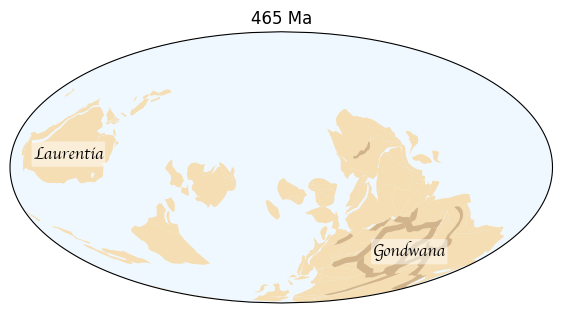

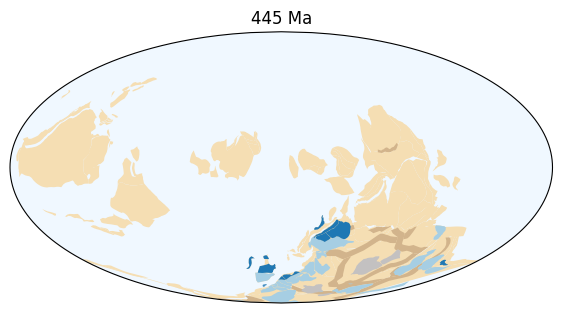

In [7]:
map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

t = 465

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
map_axis.set_facecolor(water_color)

map_axis.text(80, -50, 'Gondwana', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='cursive', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-165, 5, 'Laurentia', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='cursive', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title(f'{t} Ma')
plt.savefig('../Figures/paleogeo_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
plt.show()

map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)
map_axis.set_facecolor('#f0f8ff')

map_axis.set_title(f'{t} Ma')
plt.savefig('../Figures/paleogeo_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
plt.show()

### Plot sutures, arcs, and ophiolites


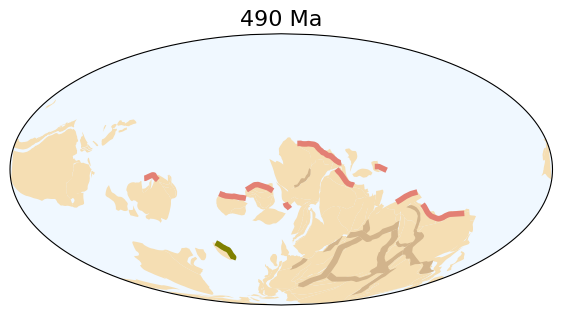

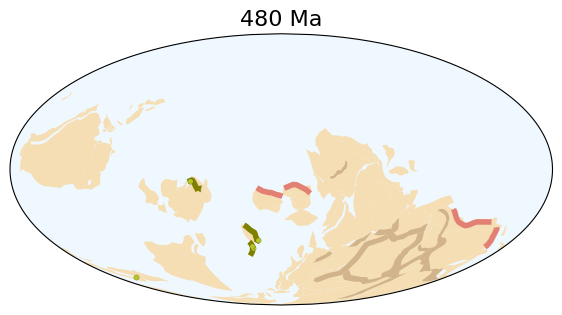

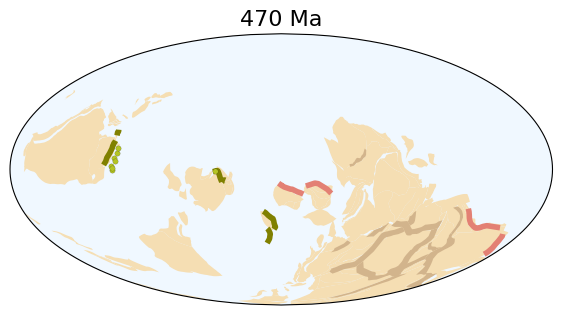

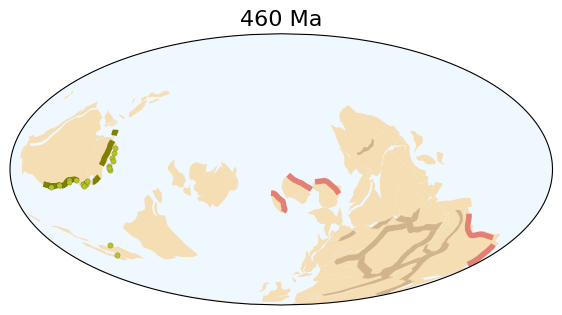

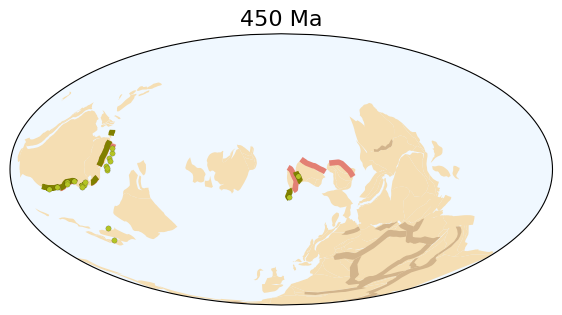

In [8]:
def make_arc_suture_map(t, plot_ophiolites=False, plot_legend=True):
    map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

    ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
    pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
    paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
    paleogeo_land = paleogeo_land.to_crs(proj_plot)

    highlands_reconstruction = output_folder + '/highlands.shp'
    pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
    highlands = gpd.read_file(highlands_reconstruction)
    highlands = highlands.to_crs(proj_plot)

    arcs_reconstruction = output_folder + '/arcs.shp'
    pygplates.reconstruct(arcs_path, modified_rot_path, arcs_reconstruction, t, 1)
    arcs = gpd.read_file(arcs_reconstruction)
    arcs = arcs.to_crs(proj_plot)

    sutures_reconstruction = output_folder + '/sutures.shp'
    pygplates.reconstruct(sutures_path, modified_rot_path, sutures_reconstruction, t, 1)
    sutures = gpd.read_file(sutures_reconstruction)
    sutures = sutures.to_crs(proj_plot)

    paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
    highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    arcs.plot(ax=map_axis, linewidth=4, color=arcs_color, edgecolor=arcs_color)
    sutures.plot(ax=map_axis, linewidth=4, color=sutures_color, edgecolor=sutures_color)
    
    if plot_ophiolites:
        ophiolites_reconstruction = output_folder + '/ophiolites.shp'
        pygplates.reconstruct(ophiolites_path, modified_rot_path, ophiolites_reconstruction, t, 1)
        ophiolites = gpd.read_file(ophiolites_reconstruction)
        ophiolites = ophiolites.to_crs(proj_plot)

        ophiolites['Suture_Int'] = ophiolites['Suture'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        ophiolites['Suture_Int'] = ophiolites['Suture_Int'].astype('Int64')
        sutures['ID_int'] = sutures['ID'].astype(int)
        sutures_filtered = sutures[(sutures['EXMAX']>t) & (sutures['EXMIN']<t)]

        ophiolites_filtered = ophiolites[ophiolites['Suture_Int'].isin(sutures_filtered['ID_int'])]
        ophiolites_filtered.plot(ax=map_axis, linewidth=0.1, markersize=15, color=ophiolites_color, 
                                edgecolor='black', zorder=100)    
    map_axis.set_facecolor(water_color)

    map_axis.set_title(f'{t} Ma', fontsize=16)
    plt.show()

for t in range(490, 440, -10):
    make_arc_suture_map(t,plot_ophiolites=True)

## Average and plot temperature data

In [32]:
conodont_data_table = pd.read_csv('../data/geochemistry/apatite_ord_varsw_1_5.csv')
all_conodont = conodont_data_table[conodont_data_table['d18O'].notna()]

In [33]:
def age_slice(dataframe,age_range_max,age_range_min):
    return dataframe[(dataframe['age']<age_range_max) & (dataframe['age']>=age_range_min)]

all_conodont_495_445 = age_slice(all_conodont,495,445)
all_conodont_495_445['country'].unique()

array(['USA', 'Canada', 'Australia', 'Argentina', 'China (South China)',
       'China (Tarim)', 'Estonia', 'Poland'], dtype=object)

In [34]:
# Function to filter the dataframe based on age range
def age_slice(dataframe, age_range_max, age_range_min):
    return dataframe[(dataframe['age'] < age_range_max) & (dataframe['age'] >= age_range_min)]

ages = [490, 480, 470, 460, 450]
age_ranges = [(age + 5, age - 5) for age in ages]

# Group the countries as needed
country_groups = {
    'Canada+USA': ['Canada', 'USA'],
    'Argentina': ['Argentina'],
    'Australia': ['Australia'],
    'South China': ['China (South China)'],
    'Tarim': ['China (Tarim)'],
    'Baltica': ['Sweden', 'Estonia', 'Poland']
}

# Bootstrap function to calculate confidence intervals
def bootstrap_mean_confidence_interval(data, n_bootstrap=1000, ci_percentiles=(2.5, 97.5)):
    # Generate bootstrap samples
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    # Calculate the confidence interval percentiles
    lower_bound = np.percentile(bootstrap_means, ci_percentiles[0])
    upper_bound = np.percentile(bootstrap_means, ci_percentiles[1])
    
    # Return mean, lower and upper bounds of confidence interval
    return np.mean(data), lower_bound, upper_bound

# Initialize lists to store the data
all_groups = []
all_mean_values = []
all_lower_ci = []
all_upper_ci = []
all_counts = []
all_centroid_lons = []
all_centroid_lats = []
all_min_ages = []
all_max_ages = []
all_ages = []
all_age_ranges = []

T_le_d18O_water_1 = []
T_le_d18O_water_1_5 = []
T_le_d18O_water_2 = []
T_le_d18O_water_thiag_h = []
T_le_d18O_water_thiag_l = []

# Process each age range
for age_range_max, age_range_min in age_ranges:
    # Filter the dataframe for the current age range
    current_df = age_slice(all_conodont, age_range_max, age_range_min)
    
    # Calculate the mean, count, and centroids for each group
    for group, countries in country_groups.items():
        filtered_df = current_df[current_df['country'].isin(countries)]
        mean_value, lower_ci, upper_ci = bootstrap_mean_confidence_interval(filtered_df['T_le_d18O_water_1_5'].values)
        T_le_d18O_water_1_mean = np.mean(filtered_df['T_le_d18O_water_1'].values)
        T_le_d18O_water_2_mean = np.mean(filtered_df['T_le_d18O_water_2'].values)        
        T_le_d18O_water_thiag_h_mean = np.mean(filtered_df['T_le_d18O_water_thiag_h'].values)
        T_le_d18O_water_thiag_l_mean = np.mean(filtered_df['T_le_d18O_water_thiag_l'].values)
        count = filtered_df.shape[0]
        
        if count >= 2 and filtered_df['long'].isna().any() == False:
            mean_lon_lat = ipmag.fisher_mean(filtered_df['long'].tolist(), filtered_df['lat'].tolist())
            centroid_lon = mean_lon_lat['dec']
            centroid_lat = mean_lon_lat['inc']
            all_centroid_lons.append(centroid_lon)
            all_centroid_lats.append(centroid_lat)
        else:
            all_centroid_lons.append(np.nan)
            all_centroid_lats.append(np.nan)

        all_groups.append(group)
        all_mean_values.append(mean_value)
        all_lower_ci.append(lower_ci)
        all_upper_ci.append(upper_ci)
        all_counts.append(count)
        all_min_ages.append(age_range_min)
        all_max_ages.append(age_range_max)
        all_ages.append((age_range_max+age_range_min)/2)
        all_age_ranges.append(f"{age_range_min}-{age_range_max}")
        T_le_d18O_water_1.append(T_le_d18O_water_1_mean)
        T_le_d18O_water_2.append(T_le_d18O_water_2_mean)
        T_le_d18O_water_thiag_h.append(T_le_d18O_water_thiag_h_mean)
        T_le_d18O_water_thiag_l.append(T_le_d18O_water_thiag_l_mean)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Group': all_groups,
    'Mean Temperature': all_mean_values,
    'Temperature lower CI': all_lower_ci,
    'Temperature upper CI': all_upper_ci,
    'Count': all_counts,
    'Centroid Longitude': all_centroid_lons,
    'Centroid Latitude': all_centroid_lats,
    'Min Age': all_min_ages,
    'Max Age': all_max_ages,
    'Age': all_ages,
    'Age Range': all_age_ranges,
    'T le d18O water 1': T_le_d18O_water_1,
    'T le d18O water 2': T_le_d18O_water_2,
    'T le d18O water thiag h': T_le_d18O_water_thiag_h,
    'T le d18O water thiag l': T_le_d18O_water_thiag_l
})

results_df


,Group,Mean Temperature,Temperature lower CI,Temperature upper CI,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range,T le d18O water 1,T le d18O water 2,T le d18O water thiag h,T le d18O water thiag l
0,Canada+USA,40.649038,39.307043,42.233341,26,247.549914,46.208356,485,495,490.0,485-495,42.899038,38.399038,29.399038,21.749038
1,Argentina,NaN,NaN,NaN,0,NaN,NaN,485,495,490.0,485-495,NaN,NaN,NaN,NaN
2,Australia,43.690000,43.015000,44.365000,2,135.984989,-18.620107,485,495,490.0,485-495,45.940000,41.440000,32.440000,24.790000
3,South China,42.700000,42.700000,42.700000,1,NaN,NaN,485,495,490.0,485-495,44.950000,40.450000,31.450000,23.800000
4,Tarim,NaN,NaN,NaN,0,NaN,NaN,485,495,490.0,485-495,NaN,NaN,NaN,NaN
5,Baltica,NaN,NaN,NaN,0,NaN,NaN,485,495,490.0,485-495,NaN,NaN,NaN,NaN
6,Canada+USA,41.943211,40.910382,43.046934,95,253.754580,37.366461,475,485,480.0,475-485,44.193211,39.693211,30.693211,23.043211
7,Argentina,35.860000,35.050000,36.760000,5,291.225024,-31.488654,475,485,480.0,475-485,38.110000,33.610000,24.610000,16.960000
8,Australia,NaN,NaN,NaN,0,NaN,NaN,475,485,480.0,475-485,NaN,NaN,NaN,NaN
9,South China,38.950000,37.950000,40.300000,9,110.756781,31.363138,475,485,480.0,475-485,41.200000,36.700000,27.700000,20.050000


In [35]:
temp_results = results_df[
    (results_df['Centroid Latitude'].notna()) &
    (results_df['Mean Temperature'].notna()) &
    (
        ((results_df['Group'] == 'South China') & (results_df['Count'] >= 4)) | #require more given uncertainty in age model
        ((results_df['Group'] != 'South China') & (results_df['Count'] >= 2))
    )
]
temp_results

,Group,Mean Temperature,Temperature lower CI,Temperature upper CI,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range,T le d18O water 1,T le d18O water 2,T le d18O water thiag h,T le d18O water thiag l
0,Canada+USA,40.649038,39.307043,42.233341,26,247.549914,46.208356,485,495,490.0,485-495,42.899038,38.399038,29.399038,21.749038
2,Australia,43.690000,43.015000,44.365000,2,135.984989,-18.620107,485,495,490.0,485-495,45.940000,41.440000,32.440000,24.790000
6,Canada+USA,41.943211,40.910382,43.046934,95,253.754580,37.366461,475,485,480.0,475-485,44.193211,39.693211,30.693211,23.043211
7,Argentina,35.860000,35.050000,36.760000,5,291.225024,-31.488654,475,485,480.0,475-485,38.110000,33.610000,24.610000,16.960000
9,South China,38.950000,37.950000,40.300000,9,110.756781,31.363138,475,485,480.0,475-485,41.200000,36.700000,27.700000,20.050000
10,Tarim,35.204704,32.041022,38.368387,4,78.988445,40.566786,475,485,480.0,475-485,37.454704,32.954704,23.954704,16.304704
12,Canada+USA,37.107163,35.499430,38.749458,52,255.748227,38.805468,465,475,470.0,465-475,39.357163,34.857163,25.857163,18.207163
13,Argentina,35.425000,33.700000,37.075000,6,291.225024,-31.488654,465,475,470.0,465-475,37.675000,33.175000,24.175000,16.525000
14,Australia,38.987500,38.065000,39.910000,2,125.192591,-20.609706,465,475,470.0,465-475,41.237500,36.737500,27.737500,20.087500
15,South China,35.331250,34.543750,36.288906,8,111.662429,31.009364,465,475,470.0,465-475,37.581250,33.081250,24.081250,16.431250


In [36]:
def reconstruct_points(results_df, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile):
    """
    Reconstructs points and saves the output to a shapefile.
    
    Parameters
    ----------
    results_df : pd.DataFrame
        DataFrame containing the points to be reconstructed with columns 'Centroid Latitude' and 'Centroid Longitude'.
    rotation_model_path : str
        Path to the rotation model file (e.g., a .rot file).
    static_polygons_path : str
        Path to the static polygons file (e.g., a .gpml file).
    reconstruction_time : float
        Geological time in millions of years ago to reconstruct the points to.
    output_shapefile : str
        Path to the output shapefile.
    """
    # Load the rotation model and static polygons
    rotation_model = pygplates.RotationModel(rotation_model_path)
    static_polygons = pygplates.FeatureCollection(static_polygons_path)
    
    # Put the points into a feature collection
    point_features = []
    for index, row in results_df.iterrows():
        point = pygplates.PointOnSphere(float(row['Centroid Latitude']), float(row['Centroid Longitude']))
        point_feature = pygplates.Feature()
        point_feature.set_geometry(point)
        point_features.append(point_feature)
    
    # Partition points into plates
    partitioned_point_features = pygplates.partition_into_plates(
        static_polygons,
        rotation_model,
        point_features
    )

    # Reconstruct the points
    pygplates.reconstruct(
        partitioned_point_features,
        rotation_model,
        output_shapefile,
        reconstruction_time, 1
    )
    
def extract_reconstructed_coordinates(shapefile_path):
    """
    Extracts reconstructed coordinates from a shapefile.
    
    Parameters
    ----------
    shapefile_path : str
        Path to the reconstructed shapefile.
        
    Returns
    -------
    pd.DataFrame
        DataFrame containing reconstructed latitude and longitude.
    """
    gdf = gpd.read_file(shapefile_path)
    coords = {'Reconstructed Latitude': gdf.geometry.y, 'Reconstructed Longitude': gdf.geometry.x}
    return pd.DataFrame(coords)

rotation_model_path = modified_rot_path
static_polygons_path = ceed_land_path
reconstruction_time = 480
output_shapefile = output_folder + '/reconstructed_temps.shp'

# Reconstruct the points from results_df
reconstruct_points(temp_results, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile)

In [37]:
output_shapefiles = []

for age in temp_results['Age'].unique():
    temp_results_age = temp_results[temp_results['Age'] == age]
    
    rotation_model_path = modified_rot_path
    static_polygons_path = ceed_land_path
    reconstruction_time = int(age)
    output_shapefile = output_folder + '/reconstructed_temps_' + str(age) + '.shp'
    output_shapefiles.append(output_shapefile)
    
    reconstruct_points(temp_results_age, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile)


In [38]:
# Read and process all shapefiles
reconstructed_data_frames = []
for shapefile in output_shapefiles:
    df = extract_reconstructed_coordinates(shapefile)
    reconstructed_data_frames.append(df)

# Optionally, concatenate all DataFrames into a single DataFrame
all_reconstructed = pd.concat(reconstructed_data_frames, ignore_index=True)

temp_results = temp_results.reset_index(drop=True)
temp_results['Reconstructed Longitude'] = all_reconstructed['Reconstructed Longitude']
temp_results['Reconstructed Latitude'] = all_reconstructed['Reconstructed Latitude']

temp_results

,Group,Mean Temperature,Temperature lower CI,Temperature upper CI,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range,T le d18O water 1,T le d18O water 2,T le d18O water thiag h,T le d18O water thiag l,Reconstructed Longitude,Reconstructed Latitude
0,Canada+USA,40.649038,39.307043,42.233341,26,247.549914,46.208356,485,495,490.0,485-495,42.899038,38.399038,29.399038,21.749038,-169.416209,12.685142
1,Australia,43.690000,43.015000,44.365000,2,135.984989,-18.620107,485,495,490.0,485-495,45.940000,41.440000,32.440000,24.790000,12.387599,4.575703
2,Canada+USA,41.943211,40.910382,43.046934,95,253.754580,37.366461,475,485,480.0,475-485,44.193211,39.693211,30.693211,23.043211,-165.210101,8.805520
3,Argentina,35.860000,35.050000,36.760000,5,291.225024,-31.488654,475,485,480.0,475-485,38.110000,33.610000,24.610000,16.960000,119.414230,-24.295147
4,South China,38.950000,37.950000,40.300000,9,110.756781,31.363138,475,485,480.0,475-485,41.200000,36.700000,27.700000,20.050000,8.645626,-17.247310
5,Tarim,35.204704,32.041022,38.368387,4,78.988445,40.566786,475,485,480.0,475-485,37.454704,32.954704,23.954704,16.304704,-23.487714,-39.328474
6,Canada+USA,37.107163,35.499430,38.749458,52,255.748227,38.805468,465,475,470.0,465-475,39.357163,34.857163,25.857163,18.207163,-161.005780,8.833786
7,Argentina,35.425000,33.700000,37.075000,6,291.225024,-31.488654,465,475,470.0,465-475,37.675000,33.175000,24.175000,16.525000,129.251739,-24.048947
8,Australia,38.987500,38.065000,39.910000,2,125.192591,-20.609706,465,475,470.0,465-475,41.237500,36.737500,27.737500,20.087500,47.914822,5.483613
9,South China,35.331250,34.543750,36.288906,8,111.662429,31.009364,465,475,470.0,465-475,37.581250,33.081250,24.081250,16.431250,22.311664,-15.701800


In [44]:
color_bar_min_temp = 24
color_bar_max_temp = 42

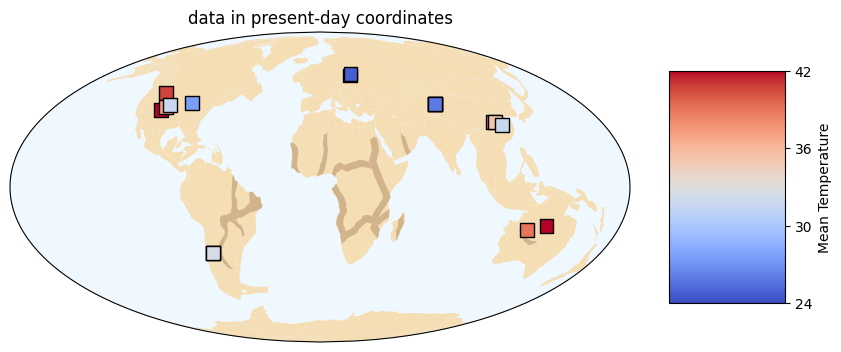

In [45]:
Laurentia_temp = temp_results[temp_results['Group'] == 'Canada+USA']
# Create the map and plot the reconstructed points

map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(10, 10), grid_lines=False)

t = 0

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
map_axis.set_facecolor(water_color)

# Normalize the temperature values for the color map
norm = plt.Normalize(vmin=color_bar_min_temp, vmax=color_bar_max_temp)

# Create a scatter plot with the colormap
scatter = map_axis.scatter(temp_results['Centroid Longitude'].tolist(), 
                           temp_results['Centroid Latitude'].tolist(), 
                           c=temp_results['Mean Temperature'].tolist(),
                           cmap='coolwarm',  # Choose a colormap
                           norm=norm,
                           transform=ccrs.PlateCarree(), 
                           marker='s', 
                           edgecolor='black', 
                           s=100)  # Size of the markers

# Add a color bar
cbar = plt.colorbar(scatter, ax=map_axis, orientation='vertical', pad=0.05, aspect=2)
cbar.set_label('Mean Temperature')
cbar.set_ticks(np.linspace(color_bar_min_temp, color_bar_max_temp, num=4))

map_axis.set_title('data in present-day coordinates')

plt.show()

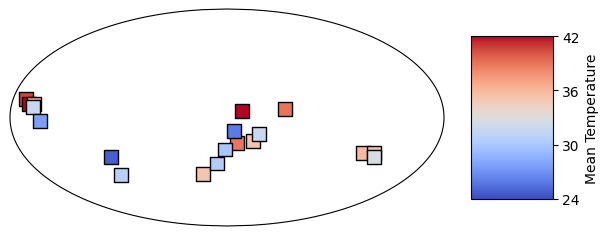

In [46]:
# Create the map and plot the reconstructed points
map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

# Normalize the temperature values for the color map
norm = plt.Normalize(vmin=color_bar_min_temp, vmax=color_bar_max_temp)

# Create a scatter plot with the colormap
scatter = map_axis.scatter(temp_results['Reconstructed Longitude'].tolist(), 
                           temp_results['Reconstructed Latitude'].tolist(), 
                           c=temp_results['Mean Temperature'].tolist(),
                           cmap='coolwarm',  # Choose a colormap
                           norm=norm,
                           transform=ccrs.PlateCarree(), 
                           marker='s', 
                           edgecolor='black', 
                           s=100)  # Size of the markers

# Add a color bar
cbar = plt.colorbar(scatter, ax=map_axis, orientation='vertical', pad=0.05, aspect=2)
cbar.set_label('Mean Temperature')
cbar.set_ticks(np.linspace(color_bar_min_temp, color_bar_max_temp, num=4))

plt.show()

In [47]:
def make_arc_suture_temp_map(t, temp_results, plot_ophiolites=False, legend=True):
    map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

    ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
    pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
    paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
    paleogeo_land = paleogeo_land.to_crs(proj_plot)

    highlands_reconstruction = output_folder + '/highlands.shp'
    pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
    highlands = gpd.read_file(highlands_reconstruction)
    highlands = highlands.to_crs(proj_plot)

    arcs_reconstruction = output_folder + '/arcs.shp'
    pygplates.reconstruct(arcs_path, modified_rot_path, arcs_reconstruction, t, 1)
    arcs = gpd.read_file(arcs_reconstruction)
    arcs = arcs.to_crs(proj_plot)

    sutures_reconstruction = output_folder + '/sutures.shp'
    pygplates.reconstruct(sutures_path, modified_rot_path, sutures_reconstruction, t, 1)
    sutures = gpd.read_file(sutures_reconstruction)
    sutures = sutures.to_crs(proj_plot)

    paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
    # highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    arcs.plot(ax=map_axis, linewidth=4, color=arcs_color, edgecolor=arcs_color)
    sutures.plot(ax=map_axis, linewidth=4, color=sutures_color, edgecolor=sutures_color)
    
    if plot_ophiolites:
        ophiolites_reconstruction = output_folder + '/ophiolites.shp'
        pygplates.reconstruct(ophiolites_path, modified_rot_path, ophiolites_reconstruction, t, 1)
        ophiolites = gpd.read_file(ophiolites_reconstruction)
        ophiolites = ophiolites.to_crs(proj_plot)

        ophiolites['Suture_Int'] = ophiolites['Suture'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        ophiolites['Suture_Int'] = ophiolites['Suture_Int'].astype('Int64')
        sutures['ID_int'] = sutures['ID'].astype(int)
        sutures_filtered = sutures[(sutures['EXMAX']>t) & (sutures['EXMIN']<t)]

        ophiolites_filtered = ophiolites[ophiolites['Suture_Int'].isin(sutures_filtered['ID_int'])]
        ophiolites_filtered.plot(ax=map_axis, linewidth=0.1, marker='s', markersize=8, color=ophiolites_color, 
                                edgecolor='black', zorder=100)    
    map_axis.set_facecolor(water_color)

    map_axis.set_title(f'{t} Ma', fontsize=16, pad=0)
    
    temp_results_filtered = temp_results[temp_results['Age'] == t]
    # Normalize the temperature values for the color map
    norm = plt.Normalize(vmin=color_bar_min_temp, vmax=color_bar_max_temp)
    
    # Define size bins and thresholds
    size_bins = [40, 100, 200, 300]
    thresholds = [10, 40, 100]

    # Function to map count values to marker sizes
    def map_count_to_size(count):
        if count <= thresholds[0]:
            return size_bins[0]
        elif count <= thresholds[1]:
            return size_bins[1]
        elif count <= thresholds[2]:
            return size_bins[2]
        else:
            return size_bins[3]
        
    sizes = [map_count_to_size(count) for count in temp_results_filtered['Count']]

# Create a scatter plot with the colormap
    scatter = map_axis.scatter(temp_results_filtered['Reconstructed Longitude'].tolist(), 
                                temp_results_filtered['Reconstructed Latitude'].tolist(), 
                                c=temp_results_filtered['Mean Temperature'].tolist(),
                                cmap='coolwarm',  # Choose a colormap
                                norm=norm,
                                transform=ccrs.PlateCarree(), 
                                marker='o', 
                                edgecolor='black', 
                                s=sizes,
                                zorder=101)  # Size of the markers
    
    if legend==True:
        # Create a new axis below the main plot for the colorbar and legend
        fig = map_axis.get_figure()
        cbar_axis = fig.add_axes([0.4, 0.09, 0.5, 0.03])
        cbar = plt.colorbar(scatter, cax=cbar_axis, orientation='horizontal')
        cbar.set_label('mean temperature (ºC)')
        cbar.set_ticks(np.linspace(color_bar_min_temp, color_bar_max_temp, num=7))

        temp_labels = [
        r'$\delta^{18}\mathrm{O}$ conodont <= {thresholds[0]}',
        f'{thresholds[0]} < Count <= {thresholds[1]}',
        f'{thresholds[1]} < Count <= {thresholds[2]}',
        f'Count > {thresholds[2]}']
        
        temp_labels = [
        r'$\delta^{18}\mathrm{O}$ conodont (' + str(2) + ' to ' + str(thresholds[0]) + ')',
        r'$\delta^{18}\mathrm{O}$ conodont (' + str(thresholds[0]) + ' to ' + str(thresholds[1]) + ')',
        r'$\delta^{18}\mathrm{O}$ conodont (' + str(thresholds[1]) + ' to ' + str(thresholds[2]) + ')',
        r'$\delta^{18}\mathrm{O}$ conodont (> ' + str(thresholds[2]) + ')'
        ]
        
        legend_handles = [
            Line2D([0], [0], color=arcs_color, lw=4, label='continental arcs'),
            Line2D([0], [0], color=sutures_color, lw=4, label='arc-continent sutures'),
            Line2D([0], [0], color=ophiolites_color, marker='s', lw=0, markersize=8, markeredgecolor='black', label='ophiolites'),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[0], markerfacecolor='white', markersize=np.sqrt(size_bins[0])),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[1], markerfacecolor='white', markersize=np.sqrt(size_bins[1])),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[2], markerfacecolor='white', markersize=np.sqrt(size_bins[2])),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[3], markerfacecolor='white', markersize=np.sqrt(size_bins[3]))
            ]
        
        legend_axis = fig.add_axes([0.15, 0.15, 0.7, 0.03])
        legend_axis.axis('off')  # Hide the axis
        legend_axis.legend(handles=legend_handles, loc='center', ncol=3, frameon=False)

    return map_fig, map_axis, proj_plot

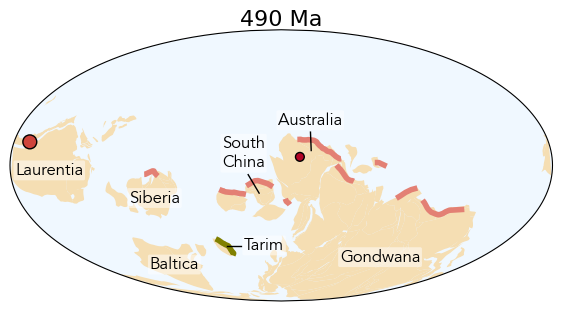

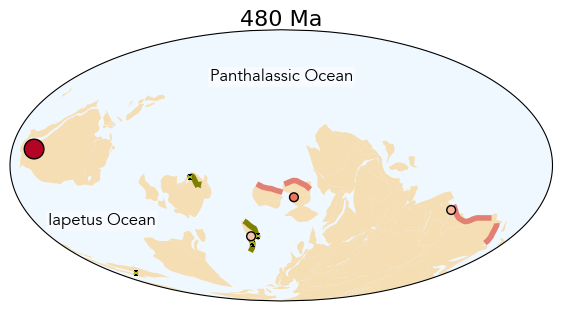

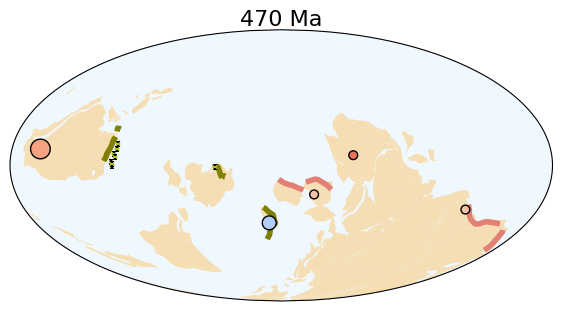

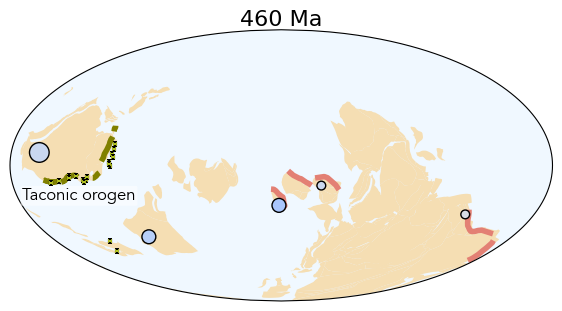

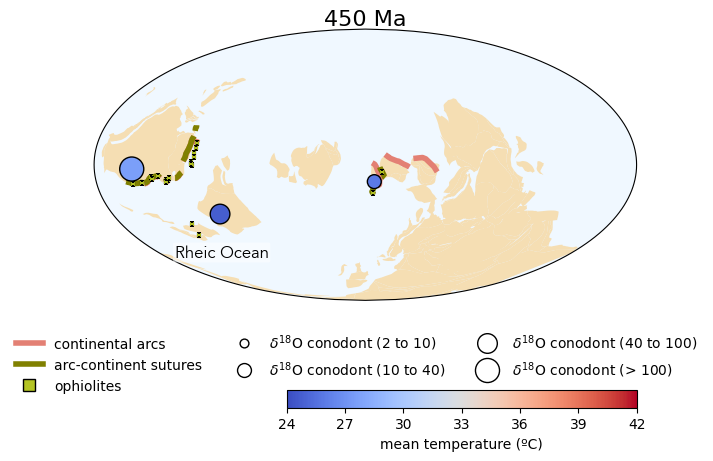

In [48]:
font_properties = {
    'fontname': 'Avenir',
    'fontsize': 12
}

t = 490
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t, temp_results, plot_ophiolites=True, legend=False)  
map_axis.text(55, -55, 'Gondwana', transform=ccrs.Geodetic(), fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-177, -5, 'Laurentia', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-135, -60, 'Baltica', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-105, -20, 'Siberia', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-25, -3, 'South\nChina', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
map_axis.plot([-22, -15], [-5, -15], transform=ccrs.Geodetic(), color='black',linewidth=1)
map_axis.text(-15, -50, 'Tarim', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
map_axis.plot([-45, -33], [-45, -45], transform=ccrs.Geodetic(), color='black',linewidth=1)
map_axis.text(20, 20, 'Australia', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
map_axis.plot([20, 20], [8, 18], transform=ccrs.Geodetic(), color='black',linewidth=1)
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 480
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False)    
map_axis.text(0, 45, 'Panthalassic Ocean', transform=ccrs.Geodetic(),  fontdict=font_properties,
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
map_axis.text(-135, -35, 'Iapetus Ocean', transform=ccrs.Geodetic(),  fontdict=font_properties,
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 470
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False)    
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 460
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False) 
map_axis.text(-140, -21, 'Taconic orogen', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 450
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=True)  
map_axis.text(-135, -55, 'Rheic Ocean', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')  
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

## Plot the mean temperatures at reconstructed paleolatitudes in comparison with PhanDA

The csv files with the 5th, 16th, 50th, 84th, and 95th percentiles of Judd et al., 2024 PhanDA's reconstructed latitudinal temperature gradient are imported. They are then plotted with the conodont means and bootstrapped confidence intervals that are calculated above at the reconstructed paleolatitudes.

In [49]:
temp_lat_Tremadocian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Tremadocian.csv')
temp_lat_Floian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Floian.csv')
temp_lat_Dapingian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Dapingian.csv')
temp_lat_Darriwilian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Darriwilian.csv')
temp_lat_Sandbian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Sandbian.csv')
temp_lat_Katian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Katian.csv')
temp_lat_Hirnantian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Hirnantian.csv')
temp_lat_Ypresian = pd.read_csv('https://github.com/EJJudd/PhanDA/raw/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Ypresian.csv')
temp_lat_Tortonian = pd.read_csv('https://github.com/EJJudd/PhanDA/raw/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Tortonian.csv')
temp_lat_UpperPleistocene = pd.read_csv('https://github.com/EJJudd/PhanDA/raw/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_UpperPleistocene.csv')

In [50]:
Cambrian_Tremadocian = 485.4
Tremadocioan_Floian = 477.7
Floian_Dapingian = 470.0
Dapingian_Darriwilian = 467.3
Darriwilian_Sandbian = 458.4
Sandbian_Katian = 453.0
Katian_Hirnantian = 445.2
Hirnantian_Silurian = 443.8

Tremadocian_mean_age = (Cambrian_Tremadocian + Tremadocioan_Floian) / 2
Floian_mean_age = (Tremadocioan_Floian + Floian_Dapingian) / 2
Dapingian_mean_age = (Floian_Dapingian + Dapingian_Darriwilian) / 2
Darriwilian_mean_age = (Dapingian_Darriwilian + Darriwilian_Sandbian) / 2
Sandbian_mean_age = (Darriwilian_Sandbian + Sandbian_Katian) / 2
Katian_mean_age = (Sandbian_Katian + Katian_Hirnantian) / 2
Hirnantian_mean_age = (Katian_Hirnantian + Hirnantian_Silurian) / 2

# Collect the mean ages
mean_ages = [
    Tremadocian_mean_age, 
    Floian_mean_age, 
    Dapingian_mean_age, 
    Darriwilian_mean_age, 
    Sandbian_mean_age, 
    Katian_mean_age, 
    Hirnantian_mean_age
]

# Normalize the ages to use in colormap
norm = plt.Normalize(440, 490)
cmap = plt.get_cmap('viridis')

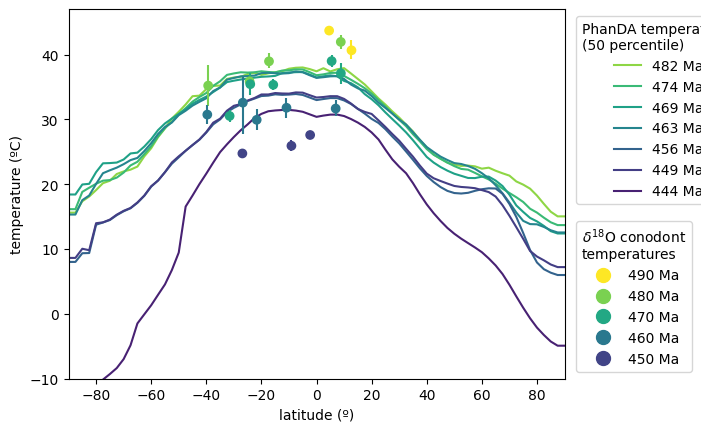

In [51]:
# Define your plots with colors based on mean ages
line1 = plt.plot(temp_lat_Tremadocian['Latitude'], temp_lat_Tremadocian['LTG_50'], 
                 color=cmap(norm(Tremadocian_mean_age)), label=f'{round(Tremadocian_mean_age)} Ma')
line2 = plt.plot(temp_lat_Floian['Latitude'], temp_lat_Floian['LTG_50'], 
                 color=cmap(norm(Floian_mean_age)), label=f'{round(Floian_mean_age)} Ma')
line3 = plt.plot(temp_lat_Dapingian['Latitude'], temp_lat_Dapingian['LTG_50'], 
                 color=cmap(norm(Dapingian_mean_age)), label=f'{round(Dapingian_mean_age)} Ma')
line4 = plt.plot(temp_lat_Darriwilian['Latitude'], temp_lat_Darriwilian['LTG_50'], 
                 color=cmap(norm(Darriwilian_mean_age)), label=f'{round(Darriwilian_mean_age)} Ma')
line5 = plt.plot(temp_lat_Sandbian['Latitude'], temp_lat_Sandbian['LTG_50'], 
                 color=cmap(norm(Sandbian_mean_age)), label=f'{round(Sandbian_mean_age)} Ma')
line6 = plt.plot(temp_lat_Katian['Latitude'], temp_lat_Katian['LTG_50'], 
                 color=cmap(norm(Katian_mean_age)), label=f'{round(Katian_mean_age)} Ma')
line7 = plt.plot(temp_lat_Hirnantian['Latitude'], temp_lat_Hirnantian['LTG_50'], 
                 color=cmap(norm(Hirnantian_mean_age)), label=f'{round(Hirnantian_mean_age)} Ma')

# Create the first legend for the plot lines
first_legend = plt.legend(title="PhanDA temperatures\n(50 percentile)", loc='upper left', bbox_to_anchor=(1.01, 1))

for i in range(len(temp_results)):
    # Get the current latitude, mean temperature, lower CI, upper CI, and age for coloring
    latitude = temp_results['Reconstructed Latitude'].iloc[i]
    mean_temp = temp_results['Mean Temperature'].iloc[i]
    lower_error = mean_temp - temp_results['Temperature lower CI'].iloc[i]
    upper_error = temp_results['Temperature upper CI'].iloc[i] - mean_temp
    age = temp_results['Age'].iloc[i]

    # Plot the error bar with the same color as the scatter point
    plt.errorbar(
        latitude, mean_temp,
        yerr=[[lower_error], [upper_error]],
        fmt='None',
        color=cmap(norm(age)),  # Color based on age
        ecolor=cmap(norm(age)),  # Color error bars based on age
        capsize=0,
        zorder=100
    )

# Plot scatter data with its own label
scatter = plt.scatter(temp_results['Reconstructed Latitude'], temp_results['Mean Temperature'], 
                      c=temp_results['Age'], cmap=cmap, norm=norm, 
                      label='$\delta^{18}\mathrm{O}$ conodont temperatures', zorder=101)

# Create unique values for ages and corresponding colors from the scatter plot
unique_ages = np.unique(temp_results['Age'])
colors = cmap(norm(unique_ages))

# Flip the order of unique ages and colors for the legend
unique_ages = unique_ages[::-1]
colors = colors[::-1]

# Create custom legend handles for the unique ages as circles
handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                         markersize=10, label=f'{int(unique_ages[i])} Ma') for i in range(len(unique_ages))]

# Add the second legend for the scatter plot with age labels
second_legend = plt.legend(handles=handles, title="$\delta^{18}\mathrm{O}$ conodont\ntemperatures", loc='lower left', bbox_to_anchor=(1.01, 0))

# Add the first legend back to the plot (after creating the second legend)
plt.gca().add_artist(first_legend)

plt.xlim(-90, 90)
plt.ylim(-10, 47)
plt.ylabel('temperature (ºC)')
plt.xlabel('latitude (º)')
plt.show()

In [82]:
def plot_with_bounds(
    ax, temp_results, lower_bound_column, upper_bound_column, cmap, norm, 
    marker='o', open_markers=False, marker_size=5
):
    """
    Plots data points with an optional line connecting upper and lower bounds.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.AxesSubplot
        The axes on which to plot the data.
    temp_results : pandas.DataFrame
        The dataframe containing the data to plot.
    lower_bound_column : str
        The column name for the lower bound y-values to plot.
    upper_bound_column : str
        The column name for the upper bound y-values to plot.
    cmap : matplotlib.colors.Colormap
        Colormap for scatter plot.
    norm : matplotlib.colors.Normalize
        Normalization for colormap based on data range.
    marker : str, optional
        The marker style for scatter points.
    open_markers : bool, optional
        If True, uses open circles for the markers.
    """
    
    # Plot lines for bounds and markers at bounds
    for _, row in temp_results.iterrows():
        # Get color from Age using colormap and normalization
        color = cmap(norm(row['Age']))

        linestyle = 'dotted' if open_markers else '-'
        
        # Line between lower and upper bounds
        ax.plot(
            [row['Reconstructed Latitude'], row['Reconstructed Latitude']],
            [row[lower_bound_column], row[upper_bound_column]],
            color=color,
            linestyle=linestyle, 
            linewidth=1, 
            zorder=100
        )
        
        # Determine facecolor based on open_markers flag
        facecolor = 'white' if open_markers and marker == marker else color
        
        # Markers at the lower and upper bounds
        ax.scatter(
            row['Reconstructed Latitude'],
            row[lower_bound_column],
            edgecolor=color,  # edge color remains the same
            facecolor=facecolor,
            marker=marker,
            zorder=102,
            s=marker_size
        )
        
        ax.scatter(
            row['Reconstructed Latitude'],
            row[upper_bound_column],
            edgecolor=color,
            facecolor=facecolor,
            marker=marker,
            zorder=102,
            s=marker_size
        )

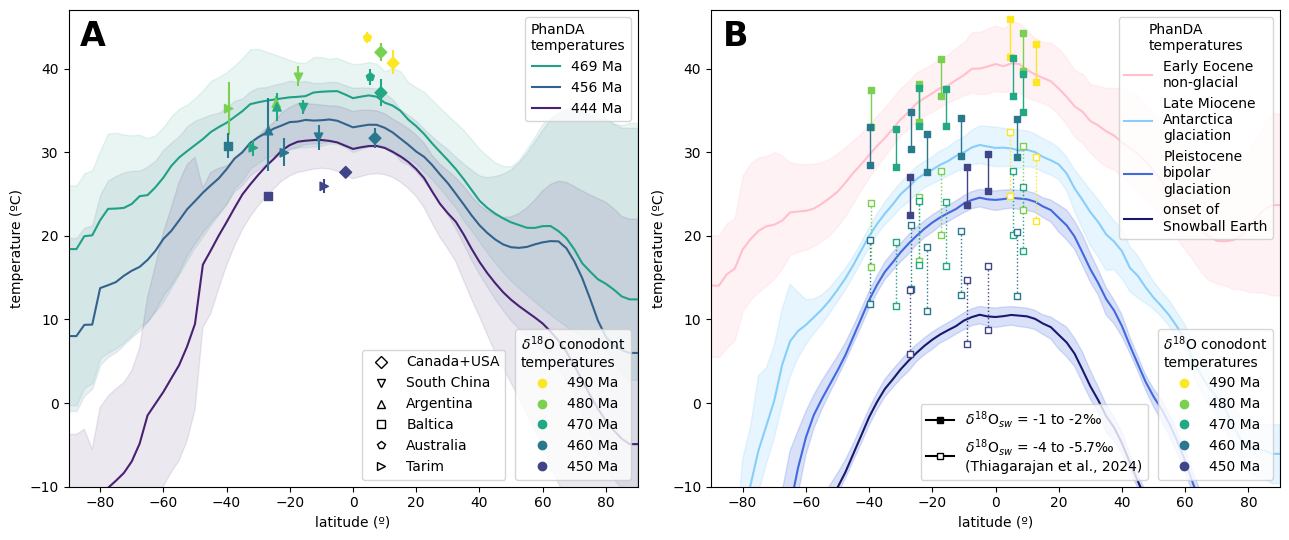

In [83]:
# Define a mapping from 'Group' values to marker styles
group_to_marker = {
    'Canada+USA': 'D',      # Circle for Canada+USA
    'South China': 'v',     # Square for South China
    'Argentina': '^',       # Triangle for Argentina
    'Baltica': 's',
    'Australia': 'p',
    'Tarim': '>'      
}

def plot_temp_data(ax, temp_results, temp_column_name, cmap, norm, group_to_marker, 
                   group=True, plot_error_bars=True, plot_open_circles=False):
    """
    Plots temperature data with error bars and group-specific scatter markers.
    
    Parameters:
    - ax: Matplotlib axis object for plotting.
    - temp_results: DataFrame containing the temperature data.
    - cmap: Colormap for the age values.
    - norm: Normalization for colormap scaling.
    - group_to_marker: Dictionary mapping group names to marker styles.
    """
    # Loop over each row of temp_results to plot error bars and scatter points
    if plot_error_bars:
        for i in range(len(temp_results)):
            latitude = temp_results['Reconstructed Latitude'].iloc[i]
            mean_temp = temp_results[temp_column_name].iloc[i]
            lower_error = mean_temp - temp_results['Temperature lower CI'].iloc[i]
            upper_error = temp_results['Temperature upper CI'].iloc[i] - mean_temp
            age = temp_results['Age'].iloc[i]

            # Plot error bars
            ax.errorbar(
                latitude, mean_temp,
                yerr=[[lower_error], [upper_error]],
                fmt='None',
                color=cmap(norm(age)),  # Color based on age
                ecolor=cmap(norm(age)),  # Color error bars based on age
                capsize=0,
                zorder=100
            )

    if group:
    # Loop through groups and plot scatter points with corresponding markers
        for group, marker_type in group_to_marker.items():
            # Subset data for the current group
            group_mask = temp_results['Group'] == group
            ax.scatter(
                temp_results['Reconstructed Latitude'][group_mask], 
                temp_results[temp_column_name][group_mask], 
                c=temp_results['Age'][group_mask], 
                cmap=cmap, norm=norm, 
                label=group,
                marker=marker_type,
                zorder=101
            )
    elif plot_open_circles:
        ax.scatter(
            temp_results['Reconstructed Latitude'], 
            temp_results[temp_column_name], 
            edgecolors=cmap(norm(temp_results['Age'])),  # Color the edge based on Age
            facecolors='none',  # Make the marker hollow
            cmap=cmap, 
            norm=norm, 
            marker='o',  # Circle marker
            label='$\delta^{18}\mathrm{O}$ conodont temperatures', 
            zorder=101
        )
    else:
        # Plot all data with the same marker
        ax.scatter(
            temp_results['Reconstructed Latitude'], 
            temp_results[temp_column_name], 
            c=temp_results['Age'], 
            cmap=cmap, norm=norm, 
            label='All data',
            marker='o',
            zorder=101
        )

def plot_temperature_latitude_subplot(ax, temp_lat_Tremadocian, temp_lat_Floian, temp_lat_Dapingian,
                                      temp_lat_Darriwilian, temp_lat_Sandbian, temp_lat_Katian, 
                                      temp_lat_Hirnantian, temp_results, cmap, norm, Tremadocian_mean_age,
                                      Floian_mean_age, Dapingian_mean_age, Darriwilian_mean_age,
                                      Sandbian_mean_age, Katian_mean_age, Hirnantian_mean_age):
        
    ax.plot(temp_lat_Dapingian['Latitude'], temp_lat_Dapingian['LTG_50'], 
            color=cmap(norm(Dapingian_mean_age)), label=f'{round(Dapingian_mean_age)} Ma')
    ax.fill_between(temp_lat_Dapingian['Latitude'], 
                    temp_lat_Dapingian['LTG_95'], temp_lat_Dapingian['LTG_05'], 
                    color=cmap(norm(Dapingian_mean_age)), alpha=0.1)    
    ax.plot(temp_lat_Sandbian['Latitude'], temp_lat_Sandbian['LTG_50'], 
            color=cmap(norm(Sandbian_mean_age)), label=f'{round(Sandbian_mean_age)} Ma')
    ax.fill_between(temp_lat_Sandbian['Latitude'], 
                    temp_lat_Sandbian['LTG_95'], temp_lat_Sandbian['LTG_05'], 
                    color=cmap(norm(Sandbian_mean_age)), alpha=0.1)     
    ax.plot(temp_lat_Hirnantian['Latitude'], temp_lat_Hirnantian['LTG_50'], 
            color=cmap(norm(Hirnantian_mean_age)), label=f'{round(Hirnantian_mean_age)} Ma')
    
    ax.fill_between(temp_lat_Hirnantian['Latitude'], 
                    temp_lat_Hirnantian['LTG_95'], temp_lat_Hirnantian['LTG_05'], 
                    color=cmap(norm(Hirnantian_mean_age)), alpha=0.1)  

    first_legend = ax.legend(title="PhanDA\ntemperatures", loc='upper right', bbox_to_anchor=(1, 1))
    
    plot_temp_data(ax, temp_results, 'Mean Temperature', cmap, norm, group_to_marker)

    # Create custom legend handles for scatter plot
    unique_ages = np.unique(temp_results['Age'])
    colors = cmap(norm(unique_ages))

    # Reverse the order for the legend
    unique_ages = unique_ages[::-1]
    colors = colors[::-1]

    handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                             markersize=6, label=f'{int(unique_ages[i])} Ma') for i in range(len(unique_ages))]

    second_legend = ax.legend(handles=handles, title="$\delta^{18}\mathrm{O}$ conodont\ntemperatures", 
                              loc='lower right', bbox_to_anchor=(1, 0))
    
    handles = [
        mlines.Line2D([], [], color='none', marker=marker, markeredgecolor='black', 
                    markerfacecolor='none', markersize=6, label=group) 
        for group, marker in group_to_marker.items()
    ]

    ax.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.78, 0))

    # Add the first legend back after adding the second one
    ax.add_artist(first_legend)
    ax.add_artist(second_legend)

    ax.set_xlim(-90, 90)
    ax.set_ylim(-10, 47)
    ax.set_ylabel('temperature (ºC)')
    ax.set_xlabel('latitude (º)')

def plot_temperature_latitude_glaciation_subplot(ax, temp_lat_Ypresian, temp_lat_Tortonian, temp_lat_UpperPleistocene, 
                                                 temp_results, cmap, norm, handles):
        
    ax.plot(temp_lat_Ypresian['Latitude'], temp_lat_Ypresian['LTG_50'], 
            color='Pink', label='Early Eocene\nnon-glacial')
    ax.fill_between(temp_lat_Ypresian['Latitude'], 
                    temp_lat_Ypresian['LTG_95'], temp_lat_Ypresian['LTG_05'], 
                    color='Pink', alpha=0.2)

    ax.plot(temp_lat_Tortonian['Latitude'], temp_lat_Tortonian['LTG_50'], 
            color='LightSkyBlue', label='Late Miocene\nAntarctica\nglaciation')
    ax.fill_between(temp_lat_Tortonian['Latitude'], 
                    temp_lat_Tortonian['LTG_95'], temp_lat_Tortonian['LTG_05'], 
                    color='LightSkyBlue', alpha=0.2)

    ax.plot(temp_lat_UpperPleistocene['Latitude'], temp_lat_UpperPleistocene['LTG_50'], 
            color='RoyalBlue', label='Pleistocene\nbipolar\nglaciation')
    ax.fill_between(temp_lat_UpperPleistocene['Latitude'], 
                    temp_lat_UpperPleistocene['LTG_95'], temp_lat_UpperPleistocene['LTG_05'], 
                    color='RoyalBlue', alpha=0.2)

    ax.plot(temp_lat_UpperPleistocene['Latitude'], 
            temp_lat_UpperPleistocene['LTG_50'] - 14, 
            color='MidnightBlue', label='onset of\nSnowball Earth')
    ax.fill_between(temp_lat_UpperPleistocene['Latitude'], 
                    temp_lat_UpperPleistocene['LTG_95'] - 14, temp_lat_UpperPleistocene['LTG_05'] - 14, 
                    color='RoyalBlue', alpha=0.2)

    first_legend = ax.legend(title="PhanDA\ntemperatures", loc='upper right', bbox_to_anchor=(1, 1))
    
    plot_with_bounds(ax, temp_results, 'T le d18O water 1', 'T le d18O water 2', cmap, norm, marker='s',marker_size=14)
    plot_with_bounds(ax, temp_results, 'T le d18O water thiag h', 'T le d18O water thiag l', cmap, norm, marker='s', open_markers=True,marker_size=14)

    handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                             markersize=6, label=f'{int(unique_ages[i])} Ma') for i in range(len(unique_ages))]

    second_legend = ax.legend(handles=handles, title="$\delta^{18}\mathrm{O}$ conodont\ntemperatures", 
                              loc='lower right', bbox_to_anchor=(1, 0))

    # Create custom legend handles
    closed_circle = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='black', 
                                markersize=5, linestyle='-', label=r'$\delta^{18}$O$_{sw}$ = -1 to -2‰')
    open_circle = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='white', 
                                markeredgecolor='black', markersize=5, linestyle='-', label='$\delta^{18}$O$_{sw}$ = -4 to -5.7‰\n(Thiagarajan et al., 2024)')


    # Add the legend with the custom handles
    plt.legend(handles=[closed_circle,open_circle], loc='lower right', bbox_to_anchor=(0.78, 0))
    
    # Add the first legend back after creating the second one
    ax.add_artist(first_legend)
    ax.add_artist(second_legend)

    # Axis settings
    ax.set_xlim(-90, 90)
    ax.set_ylim(-10, 47)
    ax.set_ylabel('temperature (ºC)')
    ax.set_xlabel('latitude (º)')

# Example of adding this plot as a subplot
fig, ax = plt.subplots(1,2,figsize=(13, 5.5))
plot_temperature_latitude_subplot(ax[0], temp_lat_Tremadocian, temp_lat_Floian, temp_lat_Dapingian, 
                                  temp_lat_Darriwilian, temp_lat_Sandbian, temp_lat_Katian, 
                                  temp_lat_Hirnantian, temp_results, cmap, norm, 
                                  Tremadocian_mean_age, Floian_mean_age, Dapingian_mean_age, 
                                  Darriwilian_mean_age, Sandbian_mean_age, Katian_mean_age, 
                                  Hirnantian_mean_age)
plot_temperature_latitude_glaciation_subplot(ax[1], temp_lat_Ypresian, temp_lat_Tortonian, temp_lat_UpperPleistocene, 
                                             temp_results, cmap, norm, handles)

ax[0].text(0.02, 0.98, 'A', transform=ax[0].transAxes, 
           fontsize=24, fontweight='bold', va='top', ha='left')
ax[1].text(0.02, 0.98, 'B', transform=ax[1].transAxes, 
           fontsize=24, fontweight='bold', va='top', ha='left')
plt.tight_layout()
plt.savefig('../Figures/PhanDA_temp_lat.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [26]:
temp_lat_Ypresian

,Latitude,LTG_05,LTG_16,LTG_50,LTG_84,LTG_95
0,90.0,12.887877,16.722419,23.668362,31.097187,34.632275
1,87.5,12.887871,16.722403,23.668353,31.097182,34.632250
2,85.0,13.187262,16.592125,23.122361,30.314144,33.346385
3,82.5,13.233079,16.090371,22.167438,28.924708,31.755402
4,80.0,13.300681,15.390706,20.859917,27.313727,29.870696
5,77.5,13.613759,15.304903,19.944838,26.331740,28.994399
6,75.0,13.653918,15.248194,19.467014,25.981545,28.292634
7,72.5,14.091288,15.788580,19.347507,26.259862,28.455168
8,70.0,14.294422,16.237412,19.400039,26.175611,28.169859
9,67.5,14.682711,16.667017,19.924467,26.200786,28.031475


In [27]:
temp_lat_Ypresian_tropics = temp_lat_Ypresian[(temp_lat_Ypresian['Latitude'] < 20) & (temp_lat_Ypresian['Latitude'] > -20)]
temp_lat_Ypresian_tropics['LTG_50'].mean()

39.472820107556075

In [28]:
temp_lat_Tortonian_tropics = temp_lat_Tortonian[(temp_lat_Tortonian['Latitude'] < 20) & (temp_lat_Tortonian['Latitude'] > -20)]
temp_lat_Tortonian_tropics['LTG_50'].mean()

29.968475575955928

In [29]:
tropics_difference = temp_lat_Ypresian_tropics['LTG_50']-temp_lat_Tortonian_tropics['LTG_50']
tropics_difference.mean()

9.504344531600147

In [30]:
temp_lat_UpperPleistocene_tropics = temp_lat_UpperPleistocene[(temp_lat_UpperPleistocene['Latitude'] < 30) & (temp_lat_UpperPleistocene['Latitude'] > -30)]
temp_lat_UpperPleistocene_tropics['LTG_50'].mean()

22.640419246064692

In [31]:
tropics_difference = temp_lat_Ypresian_tropics['LTG_50']-temp_lat_UpperPleistocene_tropics['LTG_50']
tropics_difference.mean()

15.6113923434182